In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
from pydataset import data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
import os
print(os.listdir("../Resources"))

['Strain_Dataframe.csv', 'Strain_Frame.csv', 'Strain_Frame_Energy.csv', 'Strain_Frame_HighValues.csv']


In [4]:
data = pd.read_csv('../Resources/Strain_Frame.csv')
data

,Strain,Rating,StrainType,Type: Hybrid,Type: Indica,Type: Sativa,Effect: Creative,Effect: Energetic,Effect: Tingly,Effect: Euphoric,...,Descriptor: Potent,Descriptor: Body High,Descriptor: Head High,Descriptor: Daytime,Descriptor: Nighttime,Descriptor: Outside,Descriptor: Creative,Descriptor: Psychedelic,Descriptor: Lazy,Descriptor: Calm
0,100 Og,4.0,3,1,0,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,98 White Widow,4.7,3,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1024,4.4,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13 Dawgs,4.2,3,1,0,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,0
4,24K Gold,4.6,3,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus Og,4.7,3,1,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
2347,Zkittlez,4.6,2,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2348,Zombie Kush,5.0,2,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2349,Zombie Og,4.4,2,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [5]:
data.info

<bound method DataFrame.info of               Strain  Rating  StrainType  Type: Hybrid  Type: Indica  \
0             100 Og     4.0           3             1             0   
1     98 White Widow     4.7           3             1             0   
2               1024     4.4           1             0             0   
3           13 Dawgs     4.2           3             1             0   
4           24K Gold     4.6           3             1             0   
...              ...     ...         ...           ...           ...   
2346         Zeus Og     4.7           3             1             0   
2347        Zkittlez     4.6           2             0             1   
2348     Zombie Kush     5.0           2             0             1   
2349       Zombie Og     4.4           2             0             1   
2350        Zoom Pie     4.6           2             0             1   

      Type: Sativa  Effect: Creative  Effect: Energetic  Effect: Tingly  \
0                0          

In [66]:
data.describe()

,Rating,StrainType,Type: Hybrid,Type: Indica,Type: Sativa,Effect: Creative,Effect: Energetic,Effect: Tingly,Effect: Euphoric,Effect: Relaxed,...,Descriptor: Potent,Descriptor: Body High,Descriptor: Head High,Descriptor: Daytime,Descriptor: Nighttime,Descriptor: Outside,Descriptor: Creative,Descriptor: Psychedelic,Descriptor: Lazy,Descriptor: Calm
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,4.310634,2.328371,0.515525,0.297320,0.187154,0.317737,0.274777,0.147171,0.695449,0.734156,...,0.294343,0.294343,0.287963,0.199490,0.050617,0.006806,0.063377,0.011910,0.011910,0.066355
std,0.836394,0.771431,0.499865,0.457176,0.390118,0.465696,0.446497,0.354352,0.460315,0.441876,...,0.455844,0.455844,0.452910,0.399702,0.219260,0.082232,0.243692,0.108503,0.108503,0.248954
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.700000,3.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
data.head(101)

,Strain,Rating,StrainType,Type: Hybrid,Type: Indica,Type: Sativa,Effect: Creative,Effect: Energetic,Effect: Tingly,Effect: Euphoric,...,Descriptor: Potent,Descriptor: Body High,Descriptor: Head High,Descriptor: Daytime,Descriptor: Nighttime,Descriptor: Outside,Descriptor: Creative,Descriptor: Psychedelic,Descriptor: Lazy,Descriptor: Calm
0,100 Og,4.0,3,1,0,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
1,98 White Widow,4.7,3,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1024,4.4,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13 Dawgs,4.2,3,1,0,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,0
4,24K Gold,4.6,3,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,3 Bears Og,0.0,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6,3 Kings,4.4,3,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7,303 Og,4.2,2,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
8,3D Cbd,4.6,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3X Crazy,4.4,2,0,1,0,0,0,1,1,...,0,1,1,0,0,0,0,0,0,0


In [24]:
# data.tail()

In [69]:
# data.corr()

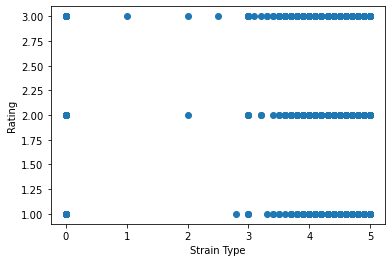

In [70]:
plt.scatter(data.Rating, data.StrainType)
plt.xlabel("Strain Type")
plt.ylabel("Rating")
plt.show()

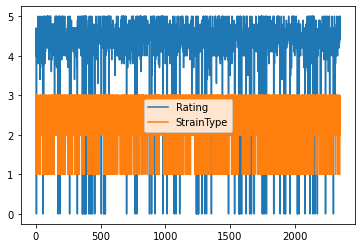

In [72]:
data_plot = data.loc[:,["Rating","StrainType"]]
data_plot.plot()

In [ ]:
# data.plot(kind = "hist",y = "Rating",bins = 50,range= (0,50),normed = True)
data.plot(kind = "hist",y = "StrainType",bins = 5,range= (0,5))

In [77]:
# f,ax = plt.subplots(figsize=(20, 10))
# # # sns.heatmap(data, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
# sns.heatmap(data, annot=True, linewidths=0.5,linecolor="red")
# plt.show()

In [85]:
# linear_reg = LinearRegression()
x = data.StrainType.values.reshape(-1,1)
y = data.Rating.values.reshape(-1,1)

In [86]:
linear_reg.fit(x,y)

LinearRegression()

In [87]:
# def main(print_matplotlib=False,dtype=np.float64):
#     x = np.linspace(-3,3,100).astype(dtype)
#     print(x.dtype)
#     y = 2*np.random.rand(x.shape[0])*x + np.random.rand(x.shape[0])
#     x = x.reshape((-1,1))

# # linear_reg.fit(x,y)
# reg=LinearRegression().fit(x,y)
# # lreg=LinearRegression(fit_intercept=True, normalize=True, copy_X=True).fit()
# # print(reg.intercept_,reg.coef_)

# yh = reg.predict(x)
    
# # if print_matplotlib:
# plt.scatter(x,y)
# plt.plot(x,yh)
# plt.show()

In [96]:
next_StrainType = linear_reg.predict([[235]])
print(next_StrainType)

[[0.98163996]]
